In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/ecg.csv', delimiter=',', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [5]:
# observation de la dernière colonne du df
print((df.iloc[:,-1]).value_counts())

140
1.0    2919
0.0    2079
Name: count, dtype: int64


On remarque les échantillons sont bien reparties

#### verifons si les données sont lineaires ou pas

In [6]:
X = df.iloc[:,: -1]
X

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [7]:
y = df.iloc[:,-1]

### verifions si les données sont lineaire ou Non linearie

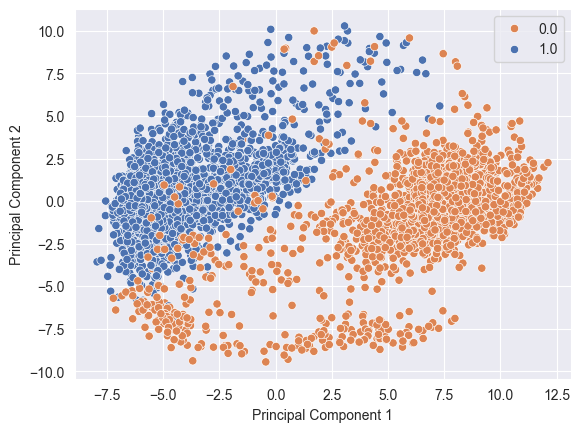

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd


# Réduction de la dimensionnalité avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Création d'un DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2'])

# Ajout de la variable cible au DataFrame PCA
pca_df['y'] = y

# Nuage de points PCA
sns.scatterplot(data=pca_df, x='Component 1', y='Component 2', hue='y', palette=sns.color_palette("deep")[0:2][::-1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(frameon=True)
plt.show()


On remarque que les données ne sont pas linéairement séparables

## Séparation des données en test et train

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standardisons nos données

In [11]:
from sklearn import preprocessing

In [12]:
# standardisation des données
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## Etude avec SVM non linaire

In [13]:
gamma = 50
kernel = 'rbf'
C = 1

In [14]:
from sklearn import svm

In [15]:
# on entraine notre Model
model_svm = svm.SVC(C = C, gamma = gamma ,kernel = kernel)
model_svm = model_svm.fit(X_train_std, y_train)

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculer la matrice de confusion
def display_confusion_matrice(y_true, y_pred):
    conf_matrix_train = confusion_matrix(y_true, y_pred)

    # Afficher la matrice de confusion sous forme de heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Matrice de confusion')
    plt.show()

def evaluate_classification_model(y_true, y_pred):
    """
    Évalue un modèle de classification et affiche les principales métriques.

    Args:
    - y_true : array-like, vrai label des données.
    - y_pred : array-like, label prédit par le modèle.

    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Affichage des métriques
    print("Métriques d'évaluation :")
    print("Accuracy :", accuracy)
    print("Precision :", precision)
    print("Recall :", recall)
    print("F1-score :", f1)

    # Affichage du rapport de classification
    print("\nRapport de classification :")
    print(classification_report(y_true, y_pred))

#### Les métriques sur les données de train

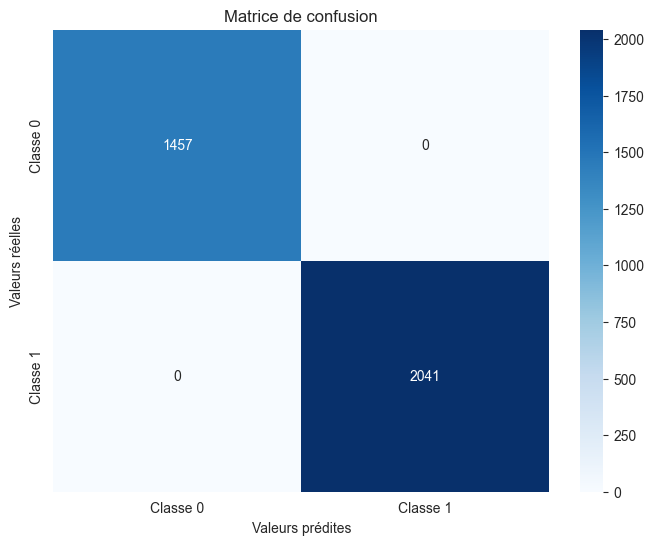

Métriques d'évaluation :
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0

Rapport de classification :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1457
         1.0       1.00      1.00      1.00      2041

    accuracy                           1.00      3498
   macro avg       1.00      1.00      1.00      3498
weighted avg       1.00      1.00      1.00      3498



In [17]:
# la qualité du model sur les données de train
y_pred_train = model_svm.predict(X_train_std)
# affichons la matrice de confusion
display_confusion_matrice(y_train, y_pred_train)
# affichons-les métriques
evaluate_classification_model(y_train, y_pred_train)

#### Les métriques sur les données de test

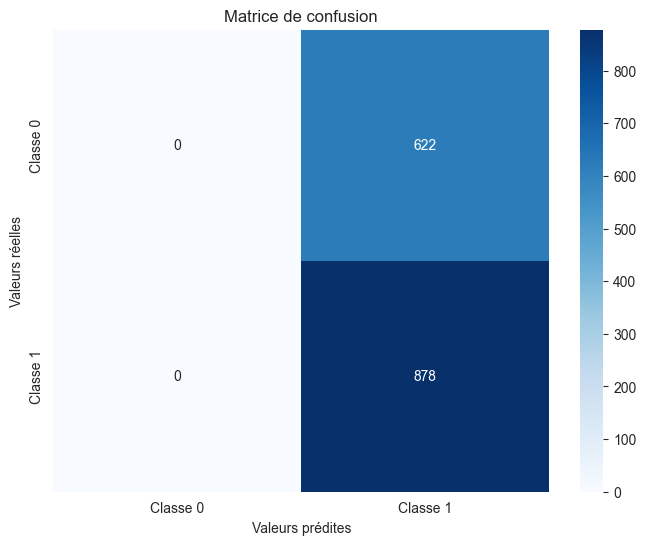

Métriques d'évaluation :
Accuracy : 0.5853333333333334
Precision : 0.5853333333333334
Recall : 1.0
F1-score : 0.7384356602186711

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       622
         1.0       0.59      1.00      0.74       878

    accuracy                           0.59      1500
   macro avg       0.29      0.50      0.37      1500
weighted avg       0.34      0.59      0.43      1500



C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# la qualité du model sur les données de test
y_pred_test = model_svm.predict(X_test_std)
# affichons la matrice de confusion
display_confusion_matrice(y_test,y_pred_test)
# affichons-les métriques
evaluate_classification_model(y_test, y_pred_test)

##### Observons la courbe ROC

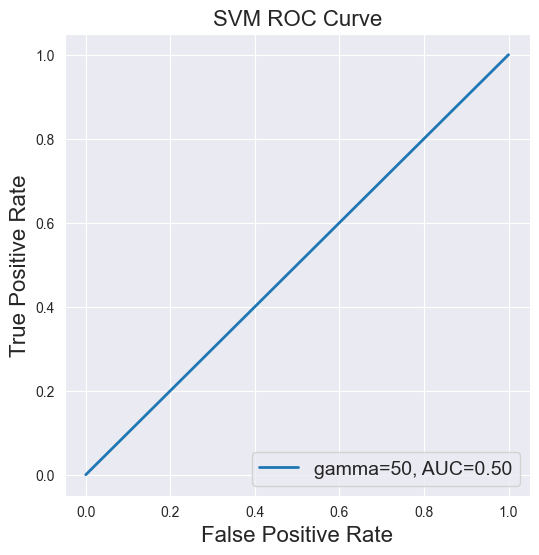

In [26]:
# prédire sur le jeu de test
y_test_pred = model_svm.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=50, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

`Ce Model n'apprend pas bien avec ces parametres parametres`

## Optimisons les performances du modèle à l’aide d’une validation croisée.

##### Sélection des hyperparamètres

In [20]:
from sklearn import model_selection
import numpy as np

# choisir 6 valeurs pour C, entre 10^-2 et 10^3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 10^-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'),
                                    param_grid,
                                    cv=5, # 5 folds de validation croisée
                                    scoring=score)

# faire tourner la recherche sur grille
grid.fit(X_train_std, y_train)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 1.0, 'gamma': 0.01} with a score of 1.00


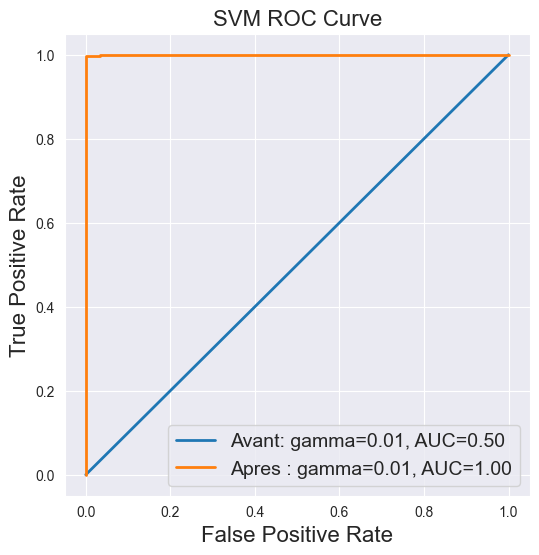

In [31]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv = grid.decision_function(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_test_pred_cv)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='Avant: gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='Apres : gamma=%.2f, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv))


# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

Ce Model apprend maintenant bien grace aux hyper-paramètres trouver de la validation croisée
Nous obtenons une courbe ROC excellente.